
# A/B Testing

A/B testing, also known as split testing, is a method used to compare two versions of a webpage, app, or product to determine which one performs better. This method is widely utilized in marketing, product design, user experience testing, and more. It helps teams make data-driven decisions by understanding which version yields the desired outcomes.


In [15]:

# Import required libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

%matplotlib inline
power_analysis = TTestIndPower()
np.random.seed(42)


## 1. Experimental Design

Before conducting A/B testing, it’s important to ensure **well-designed experiments** that can provide meaningful results.

### Key Design Principles:
- **Well-Formulated Questions**: Specific and measurable to avoid unintended consequences.
- **Selecting Appropriate Parameters**: Balance between alpha (α), power, sample size, and effect size.
- **Preprocessing Data**: Handle anomalies and outliers before running statistical tests.

**Goodheart’s Law**: When a measure becomes a target, it ceases to be a good measure.



## 2. Effect Size and P-Values

Effect size quantifies **how large the difference is** between two groups, providing practical insights beyond mere statistical significance.

**Relationship between Effect Size and P-value:**
- P-value indicates if the difference is statistically significant.
- **Effect size** shows how meaningful the difference is.

**Why do wee need to calculate the effect size**

- Communicate the practical significance of results. An effect might be statistically significant, but does it matter in practical scenarios?

- Effect size calculation and interpretation allows you to draw Meta-Analytical conclusions. This allows you to group together a number of existing studies, calculate the meta-analytic effect size and get the best estimate of the effect size of the population.

- Perform Power Analysis, which helps determine the number of participants (sample size) that a study requires to achieve a certain probability of finding a true effect - if there is one.

### Example: Height Difference Between Males and Females
We will use **SciPy** to explore the effect size of height between males and females in the US.


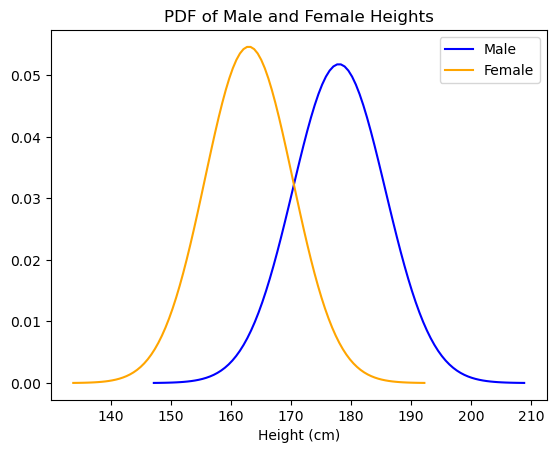

In [5]:

# Define mean and standard deviation for male and female heights
male_mean, male_sd = 178, 7.7
female_mean, female_sd = 163, 7.3

# Create normal distributions for heights
male_height = stats.norm(male_mean, male_sd)
female_height = stats.norm(female_mean, female_sd)

# Function to evaluate the PDF
def evaluate_PDF(rv, x=4):
    mean, std = rv.mean(), rv.std()
    xs = np.linspace(mean - x * std, mean + x * std, 100)
    ys = rv.pdf(xs)
    return xs, ys

# Plot PDFs for both distributions
xs, ys = evaluate_PDF(male_height)
plt.plot(xs, ys, label='Male', color='blue')

xs, ys = evaluate_PDF(female_height)
plt.plot(xs, ys, label='Female', color='orange')
plt.xlabel('Height (cm)')
plt.legend()
plt.title("PDF of Male and Female Heights")
plt.show()


## Interprataions of Results

### Shape of Distributions
- **Distribution**: Bell-shaped and normal.
- **Males**: Generally taller (mean: **178 cm**).
- **Females**: Generally shorter (mean: **163 cm**).

### Spread
- **Males**: More variability (SD: **7.7 cm**).
- **Females**: Less variability (SD: **7.3 cm**).

### Probability Density
- Higher peaks near the mean.
- Areas under the curves sum to **1**.

### Comparative Analysis
- Overlap shows that some females can be taller than shorter males, illustrating height variability.



## 3. Calculating Effect Size (Unstandardized and Standardized)

### 3.1 Unstandardized Effect Size
The difference in means provides an **unstandardized effect size**.




In [6]:

# Generate samples from the distributions
male_sample = male_height.rvs(1000)
female_sample = female_height.rvs(1000)

# Calculate the difference in means
difference_in_means = male_sample.mean() - female_sample.mean()
print(f"Difference in Means: {difference_in_means:.2f} cm")

Difference in Means: 14.63 cm


## Interpretation of Results

### Significance of Difference
A difference of **14.63 cm** suggests that, on average, the male sample is significantly taller than the female sample.

### Relevance
This difference can be significant in various applications, such as ergonomics, clothing design, and health assessments. For example, understanding average height differences can guide product design to ensure that items like chairs, desks, and clothing fit appropriately for different genders.

### 3.2 Cohen's d (Standardized Effect Size)
Cohen’s d expresses the size of the effect in terms of **standard deviations**.


In [12]:
# Function to compute Cohen's d
def Cohen_d(group1, group2):
    diff = group1.mean() - group2.mean()
    n1, n2 = len(group1), len(group2)
    pooled_var = ((n1 - 1) * group1.var() + (n2 - 1) * group2.var()) / (n1 + n2 - 2)
    return diff / np.sqrt(pooled_var)

# Calculate and display Cohen's d
cohen_d_value = Cohen_d(male_sample, female_sample)
print(f"Cohen's d: {cohen_d_value:.2f}")

Cohen's d: 1.98


## Interpretation of Cohen's d

### Understanding Cohen's d
Cohen's d provides a measure of the effect size, which can help in understanding the practical significance of the difference between groups. The value of Cohen's d can be interpreted as follows:
- **0.2**: Small effect size
- **0.5**: Medium effect size
- **0.8**: Large effect size

A Cohen's d of **1.98** significantly exceeds the threshold for a large effect, suggesting that the difference in means between the two groups (males and females) is substantial. This indicates a strong practical significance in the difference observed, highlighting that the difference in heights is not only statistically significant but also meaningful in real-world contexts.

### Further Analysis
This measure can be used in conjunction with statistical tests (like t-tests) to provide a more comprehensive view of the data. In reports or presentations, Cohen's d can be used to substantiate claims about differences between groups, helping stakeholders understand the relevance of findings.


## 4. Statistical Power

**Statistical power** is the probability of rejecting the null hypothesis when it is false (avoiding a Type II error).

### Factors Affecting Power:
- **Alpha (α)**: The significance level.
- **Sample Size**: Larger samples increase power.
- **Effect Size**: Larger effect sizes make it easier to detect differences.

We can visualize the power curve using `statsmodels`.


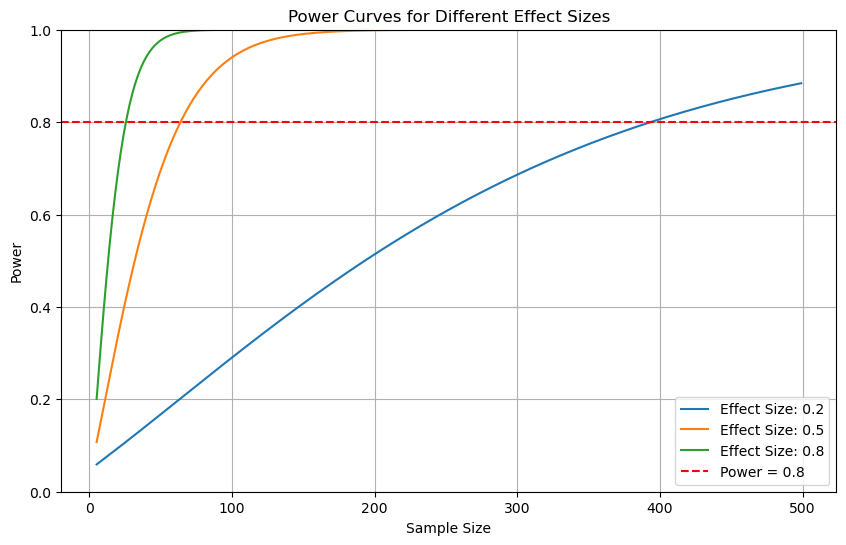

In [16]:
# Plot power curves for different effect sizes
effect_sizes = [0.2, 0.5, 0.8]

plt.figure(figsize=(10, 6))

nobs_range = np.arange(5, 500)

for es in effect_sizes:
    power = [power_analysis.solve_power(effect_size=es, nobs1=n, alpha=0.05) for n in nobs_range]
    plt.plot(nobs_range, power, label=f'Effect Size: {es}')

plt.title("Power Curves for Different Effect Sizes")
plt.xlabel("Sample Size")
plt.ylabel("Power")
plt.ylim(0, 1)
plt.axhline(y=0.8, color='r', linestyle='--', label='Power = 0.8')
plt.legend()
plt.grid()
plt.show()


## Interpretation of the Power Curves

### Understanding Power
Power is the probability of correctly rejecting a false null hypothesis (avoiding a Type II error). A higher power (close to 1) indicates a greater likelihood of detecting an effect when one exists.

### Effect of Sample Size
- As expected, the curves show that increasing sample size leads to an increase in power for all effect sizes.
- For a given effect size, larger sample sizes provide more reliable estimates and increase the likelihood of detecting true effects.

### Comparison of Effect Sizes
The power curves illustrate that:
- A small effect size (0.2) requires a much larger sample size to achieve a power of 0.8 compared to medium (0.5) and large (0.8) effect sizes.
- Medium and large effect sizes achieve a power of 0.8 with fewer samples.

These observations highlight the importance of considering both effect size and sample size when designing experiments to ensure that the study is adequately powered to detect meaningful differences.


## 5. Ethical Considerations in A/B Testing

When conducting A/B tests, especially with real users, it is important to consider ethics. 

### Key Ethical Concerns:
1. **Informed Consent**: Participants must be aware of the test.
2. **Assessment of Risks and Benefits**: Weigh potential risks against benefits.
3. **Fair Selection of Subjects**: Avoid targeting vulnerable populations.

Example: The Facebook "emotional contagion" study was criticized for manipulating users' emotions without their consent.


In [18]:
type("Louis")

str